# Part 6 - Standard Geography Queries

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Standard-Geography-Queries" data-toc-modified-id="Standard-Geography-Queries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Standard Geography Queries</a></span><ul class="toc-item"><li><span><a href="#Using-Standard-Geography-Query" data-toc-modified-id="Using-Standard-Geography-Query-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Using Standard Geography Query</a></span><ul class="toc-item"><li><span><a href="#Enrich-using-results-from-Standard-Geography-Query" data-toc-modified-id="Enrich-using-results-from-Standard-Geography-Query-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Enrich using results from Standard Geography Query</a></span></li><li><span><a href="#Visualize-on-a-Map" data-toc-modified-id="Visualize-on-a-Map-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Visualize on a Map</a></span></li></ul></li><li><span><a href="#Customizing-your-Query" data-toc-modified-id="Customizing-your-Query-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Customizing your Query</a></span><ul class="toc-item"><li><span><a href="#Enrich-using-results-from-Standard-Geography-Query" data-toc-modified-id="Enrich-using-results-from-Standard-Geography-Query-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Enrich using results from Standard Geography Query</a></span></li><li><span><a href="#Visualize-on-a-Map" data-toc-modified-id="Visualize-on-a-Map-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Visualize on a Map</a></span></li></ul></li></ul></li><li><span><a href="#Data-Apportionment" data-toc-modified-id="Data-Apportionment-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Apportionment</a></span><ul class="toc-item"><li><span><a href="#How-Apportionment-Works" data-toc-modified-id="How-Apportionment-Works-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>How Apportionment Works</a></span></li></ul></li><li><span><a href="#Service-Limits" data-toc-modified-id="Service-Limits-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Service Limits</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

In [31]:
# Import Libraries
from arcgis.gis import GIS
from arcgis.geoenrichment import Country, enrich, service_limits, standard_geography_query

In [2]:
# Create a GIS Connection
gis = GIS(profile='your_online_profile')

In [3]:
# Get Country
usa = Country.get('USA')

## Standard Geography Queries


Previously in Geoenrichment you have learnt that a `study area` is used to define the location of the point or area that you want to enrich with additional information. Now, you will be introduced a new form of `study area` - the `Standard Geography Area` which lets you define an area by the ID of a standard geographic statistical feature, such as a census or postal area. For example, to obtain enrichment information for a U.S. state, county or ZIP Code or a Canadian province or postal code. The most common workflow for this service is to find a FIPS (standard geography ID) for a geographic name.

`standard_geography_query` method allows you to query for standard geography IDs and features at the supported geographic levels, and then they can be used to obtain facts about the location using the `enrich` method or create reports using `create_report`.

### Using Standard Geography Query

Let's look at an example to find the standard geography ID for all Orange counties in U.S. We will then use one of these IDs and `enrich()` the area with information from `Age` data collection.

We will use `US` as the source country and specify `US.Counties` as the standard geographic layer to be queried since we are looking for Orange counties across U.S. We will use `orange` as the text for the service to query.

In [4]:
# Find FIPS for all Orange counties in US
orange = standard_geography_query(source_country='US', layers='US.Counties', geoquery='orange')
orange

DatasetID  DataLayerID AreaID       AreaName MajorSubdivisionName  \
0  USA_ESRI_2020  US.Counties  06059  Orange County           California   
1  USA_ESRI_2020  US.Counties  12095  Orange County              Florida   
2  USA_ESRI_2020  US.Counties  18117  Orange County              Indiana   
3  USA_ESRI_2020  US.Counties  36071  Orange County             New York   
4  USA_ESRI_2020  US.Counties  37135  Orange County       North Carolina   
5  USA_ESRI_2020  US.Counties  48361  Orange County                Texas   
6  USA_ESRI_2020  US.Counties  50017  Orange County              Vermont   
7  USA_ESRI_2020  US.Counties  51137  Orange County             Virginia   

  MajorSubdivisionAbbr MajorSubdivisionType CountryAbbr  Score  ObjectId  
0                   CA                State          US    100         1  
1                   FL                State          US    100         2  
2                   IN                State          US    100         3  
3                   NY                State          US    100         4  
4                   NC                State          US    100         5  
5                   TX                State          US    100         6  
6                   VT                State          US    100         7  
7                   VA                State          US    100         8

The resulting dataframe shows `DatasetID, DataLayerID` which are the IDs for dataset and layer being queried. `AreaID` is the unique ID for each area in the results. `AreaName` is Orange County as we looked for Orange counties across U.S. `MajorSubdivisionName, MajorSubdivisionAbbr and MajorSubdivisionType` show the type of major subdivision i.e. `State` along with state name and abbrevation.

 #### Enrich using results from Standard Geography Query

The `standard_geography_query` returns a list of Orange counties for different states, with the state name shown as field `MajorSubdivisionName`. Now, let's `enrich()` Orange County in California using `AreaID: 06059`.

In [5]:
or_ca = {"sourceCountry":"US","layer":"US.Counties","ids":["06059"]}

In [6]:
orange_df = enrich(study_areas=[or_ca], data_collections=['Age'] )
orange_df

ID  OBJECTID StdGeographyLevel StdGeographyName StdGeographyID  \
0  0         1       US.Counties    Orange County          06059   

  sourceCountry  aggregationMethod  populationToPolygonSizeRating  \
0            US  Query:US.Counties                          2.191   

   apportionmentConfidence  HasData  ...   FEM45   FEM50   FEM55  FEM60  \
0                    2.576        1  ...  106005  107845  107235  97121   

   FEM65  FEM70  FEM75  FEM80  FEM85  \
0  81462  65917  47365  33050  40794   

                                               SHAPE  
0  {"rings": [[[-117.9157650000062, 33.9469249994...  

[1 rows x 47 columns]

In [7]:
orange_df.columns

Index(['ID', 'OBJECTID', 'StdGeographyLevel', 'StdGeographyName',
       'StdGeographyID', 'sourceCountry', 'aggregationMethod',
       'populationToPolygonSizeRating', 'apportionmentConfidence', 'HasData',
       'MALE0', 'MALE5', 'MALE10', 'MALE15', 'MALE20', 'MALE25', 'MALE30',
       'MALE35', 'MALE40', 'MALE45', 'MALE50', 'MALE55', 'MALE60', 'MALE65',
       'MALE70', 'MALE75', 'MALE80', 'MALE85', 'FEM0', 'FEM5', 'FEM10',
       'FEM15', 'FEM20', 'FEM25', 'FEM30', 'FEM35', 'FEM40', 'FEM45', 'FEM50',
       'FEM55', 'FEM60', 'FEM65', 'FEM70', 'FEM75', 'FEM80', 'FEM85', 'SHAPE'],
      dtype='object')

Enrichment using `Age` data collection resulted in many columns for various age groups. Other columns such as Standard Geography ID, Name, Level, country, and populationToPolygonSizeRating were also added with enrichment.

#### Visualize on a Map
Let's visualize the enriched geography on a map.

In [41]:
or_ca_map = gis.map('Los Angeles, CA')
or_ca_map

In [29]:
orange_df.spatial.plot(or_ca_map)

True

### Customizing your Query

`geoquery` parameter is used to specify the search criteria in order to query for the standard geography layers desired. A query is broken up into terms and operators. Multiple terms can be combined together with Boolean operators to form more complex queries. Learn more about using `geoquery` to create more complex queries [here](https://developers.arcgis.com/rest/geoenrichment/api-reference/standard-geography-query.htm).

Let's look at an example of grouping the search terms to find all `Orange or Lake` counties in US. Search supports using parentheses to group clauses to form subqueries. This can be useful if you want to control the Boolean logic for a query. 

In [33]:
or_lake = standard_geography_query(source_country='US', layers='US.Counties', geoquery='(Orange OR Lake)')
or_lake

DatasetID  DataLayerID AreaID                    AreaName  \
0   USA_ESRI_2020  US.Counties  06059               Orange County   
1   USA_ESRI_2020  US.Counties  12095               Orange County   
2   USA_ESRI_2020  US.Counties  18117               Orange County   
3   USA_ESRI_2020  US.Counties  48361               Orange County   
4   USA_ESRI_2020  US.Counties  50017               Orange County   
5   USA_ESRI_2020  US.Counties  51137               Orange County   
6   USA_ESRI_2020  US.Counties  36071               Orange County   
7   USA_ESRI_2020  US.Counties  37135               Orange County   
8   USA_ESRI_2020  US.Counties  06033                 Lake County   
9   USA_ESRI_2020  US.Counties  08065                 Lake County   
10  USA_ESRI_2020  US.Counties  12069                 Lake County   
11  USA_ESRI_2020  US.Counties  17097                 Lake County   
12  USA_ESRI_2020  US.Counties  18089                 Lake County   
13  USA_ESRI_2020  US.Counties  26085                 Lake County   
14  USA_ESRI_2020  US.Counties  27075                 Lake County   
15  USA_ESRI_2020  US.Counties  30047                 Lake County   
16  USA_ESRI_2020  US.Counties  39085                 Lake County   
17  USA_ESRI_2020  US.Counties  41037                 Lake County   
18  USA_ESRI_2020  US.Counties  47095                 Lake County   
19  USA_ESRI_2020  US.Counties  16007            Bear Lake County   
20  USA_ESRI_2020  US.Counties  27125             Red Lake County   
21  USA_ESRI_2020  US.Counties  46079                 Lake County   
22  USA_ESRI_2020  US.Counties  49035            Salt Lake County   
23  USA_ESRI_2020  US.Counties  55047           Green Lake County   
24  USA_ESRI_2020  US.Counties  02164  Lake and Peninsula Borough   
25  USA_ESRI_2020  US.Counties  27077    Lake of the Woods County   

   MajorSubdivisionName MajorSubdivisionAbbr MajorSubdivisionType CountryAbbr  \
0            California                   CA                State          US   
1               Florida                   FL                State          US   
2               Indiana                   IN                State          US   
3                 Texas                   TX                State          US   
4               Vermont                   VT                State          US   
5              Virginia                   VA                State          US   
6              New York                   NY                State          US   
7        North Carolina                   NC                State          US   
8            California                   CA                State          US   
9              Colorado                   CO                State          US   
10              Florida                   FL                State          US   
11             Illinois                   IL                State          US   
12              Indiana                   IN                State          US   
13             Michigan                   MI                State          US   
14            Minnesota                   MN                State          US   
15              Montana                   MT                State          US   
16                 Ohio                   OH                State          US   
17               Oregon                   OR                State          US   
18            Tennessee                   TN                State          US   
19                Idaho                   ID                State          US   
20            Minnesota                   MN                State          US   
21         South Dakota                   SD                State          US   
22                 Utah                   UT                State          US   
23            Wisconsin                   WI                State          US   
24               Alaska                   AK                State          US   
25            Minnesota               

We see that there are multiple Orange and Lake counties in US. Let's get the results for Orange or Lake county in California.

In [34]:
or_lake_ca = standard_geography_query(source_country='US', layers='US.Counties', geoquery='(Orange OR Lake) AND CA')
or_lake_ca

DatasetID  DataLayerID AreaID       AreaName MajorSubdivisionName  \
0  USA_ESRI_2020  US.Counties  06059  Orange County           California   
1  USA_ESRI_2020  US.Counties  06033    Lake County           California   

  MajorSubdivisionAbbr MajorSubdivisionType CountryAbbr  Score  ObjectId  
0                   CA                State          US    100         1  
1                   CA                State          US     89         2

 #### Enrich using results from Standard Geography Query

The `standard_geography_query` gave us details of Orange and Lake counties in California. Now, let's `enrich()` these counties using `AreaID`.

In [35]:
or_lk = {"sourceCountry":"US","layer":"US.Counties","ids":["06059","06033"]}

In [36]:
or_lake_df = enrich(study_areas=[or_lk], data_collections=['Age'] )
or_lake_df

ID  OBJECTID StdGeographyLevel StdGeographyName StdGeographyID  \
0  0         1       US.Counties    Orange County          06059   
1  0         2       US.Counties      Lake County          06033   

  sourceCountry  aggregationMethod  populationToPolygonSizeRating  \
0            US  Query:US.Counties                          2.191   
1            US  Query:US.Counties                          2.191   

   apportionmentConfidence  HasData  ...   FEM45   FEM50   FEM55  FEM60  \
0                    2.576        1  ...  106005  107845  107235  97121   
1                    2.576        1  ...    1918    2176    2680   2946   

   FEM65  FEM70  FEM75  FEM80  FEM85  \
0  81462  65917  47365  33050  40794   
1   2742   2104   1382    834    926   

                                               SHAPE  
0  {"rings": [[[-117.9157650000062, 33.9469249994...  
1  {"rings": [[[-122.81409900076635, 39.581399999...  

[2 rows x 47 columns]

#### Visualize on a Map
Let's visualize the enriched counties on a map.


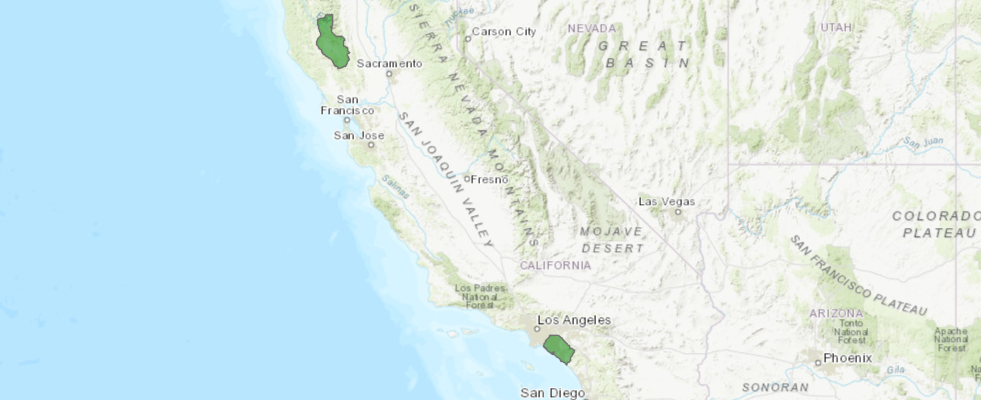

In [42]:
or_lake_map = gis.map('California, US',6)
or_lake_map

In [40]:
or_lake_df.spatial.plot(or_lake_map)

True

## Data Apportionment

The GeoEnrichment service employs a sophisticated _geographic retrieval methodology_ to aggregate data called __Data Apportionment__. This methodology determines how data is gathered and summarized or aggregated for input features. 

For _standard geographic units_ such as states, provinces, counties, or postal codes, the link between a designated area and its attribute data is a simple one-to-one relationship. So, the data retrieval is a simple process of gathering the data for those areas.

The _non-standard geographic units_ such as ring buffers, drive-time service areas, and other non-standard  polygons, the geographic retrieval process is more complicated, because the input polygon may intersect geographic areas that contain data that needs to be aggregated. 

The GeoEnrichment service uses Weighted Centroid geographic retrieval to aggregate data for rings and other polygons. With this methodology, data points within an area of interest are weighted more heavily than points outside that area. When the service aggregates data, the results are statistically adjusted to more accurately reflect the actual statistics within the area of interest.

The GeoEnrichment service uses the most detailed geographies with the most recent census data, or authoritative estimates, available for commercial use from each country. For most countries, data is updated every two years, and a few countries are updated annually because data are readily available. Esri spreads the updates throughout the year on a quarterly basis. The data for each country are the most recently available estimates. 

### How Apportionment Works

The GeoEnrichment service uses a data apportionment algorithm to redistribute demographic, business, economic, and landscape variables to input polygon features. The algorithm analyzes each polygon to be enriched relative to a point dataset and a detailed dataset of reporting unit polygons that contain attributes for the selected variables. Based on how each polygon being enriched overlays these datasets, the algorithm determines the appropriate amount of each variable to assign.

Imagine you want to get statistics on total population for the study area represented by center polygon in this image.
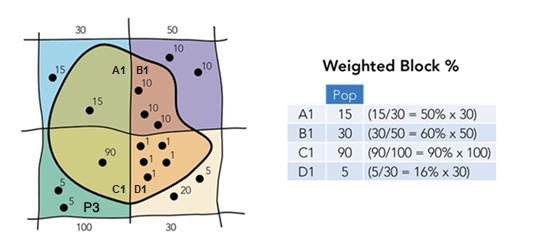

Source: https://developers.arcgis.com/rest/geoenrichment/api-reference/data-apportionment.htm


The other four polygons represent census geographies that contain total population values. In the United States, these can be Block Groups with enrichment data; in Canada, they can be Dissemination Areas.
The study area intersects 4 block groups that are partially inside the study area. Using area __P3__ as an example, the population weight for this area is determined by summing the block weights within this polygon. For example, if 90 percent of the P3 Blocks' population are within the study area, and the Total Population of P3 is 100 people, you can determine that 90 people in area P3 are inside the study area. 

So, for those partially included blocks, the GeoEnrichment service uses data apportionment and the weighted centroid retrieval method to calculate the approximate statistics for those portions of block groups inside the study area. It considers all the block points within each block group touched by the study area but weights the block points inside the study area more heavily.

You can learn more about Data Apportionment and how it works [here](https://developers.arcgis.com/rest/geoenrichment/api-reference/data-apportionment.htm).


## Service Limits

The GeoEnrichment service implements limits on users in order to guarantee accuracy and performance. The limits define the maximum size of a study area, maximum number of study areas, business records in an output, maximum drive time polygon size and many more. Exceeding these limits will cause your query to fail or be returned with a warning that you have exceeded one of these limits and will get results up until the limit is reached.

`service_limits()` method from `arcgis.geoenrichment` module can be used to discover and generate a list of service limits.

Let's look at all the service limits.

In [30]:
# Check service limits
service_limits()

paramName  \
0                                MaximumRingSize   
1                            MaximumRingSizeTime   
2         defaultFeaturesLimitPerComparisonLevel   
3                                 maxRecordCount   
4              maximumAttributeDescriptionLength   
5                         maximumDataCollections   
6            maximumDetailedMethodStudyAreasSize   
7                           maximumDriveDistance   
8               maximumDriveTimeStudyAreasNumber   
9    maximumNumberOfStudyAreasWithDetailedMethod   
10                        maximumOutFieldsNumber   
11                            maximumRingsNumber   
12        maximumSelectBusinessesResponseRecords   
13                  maximumStdGeographyIDsNumber   
14                       maximumStudyAreasNumber   
15  maximumStudyAreasNumberInfographicReportHTML   
16   maximumStudyAreasNumberInfographicReportPDF   
17                  optimalBatchStudyAreasNumber   

                                     paramDescription  \
0    Maximum size of rings for simple rings builders.   
1   Maximum size of rings (time units) for drive t...   
2   Default maximum number of features to return p...   
3               Maximum number of features to return.   
4   Maximum length of attribute’s description string.   
5   Maximum number of data collections to return o...   
6   Maximum size of rings for drive time/simple ri...   
7   Maximum size of rings for drive time rings bui...   
8   Maximum number of drive time study areas in on...   
9   Maximum number of study areas in one enrich re...   
10  Maximum number of ‘outFields’ set in intersect...   
11  Maximum number of rings for study area locatio...   
12  Maximum number of features returned by select ...   
13  Maximum number of standard geography IDs to re...   
14  Maximum number of study areas in one enrich re...   
15  Maximum number of study areas in one create in...   
16  Maximum number of study areas in one create in...   
17  Optimal number of study areas to request in ea...   

                     dataType  value  
0                   esriMiles   1000  
1   esriDriveTimeUnitsMinutes    300  
2                     numeric      5  
3                     numeric   1000  
4                     numeric   1000  
5                     numeric     20  
6                   esriMiles    300  
7                   esriMiles    300  
8                     numeric    100  
9                     numeric      3  
10                    numeric    256  
11                    numeric     10  
12                    numeric   5000  
13                    numeric   1000  
14                    numeric    100  
15                    numeric    100  
16                    numeric     50  
17                    numeric     50

The __paramName__ shows maximum size, number, drive time etc. of a study area. The __paramDescription__ column details the description of each parameter name. The __dataType__ column shows the type of data for the parameter and the __value__ column shows the service limit.

`service_limits()` method returns a Pandas' DataFrame that describes the service's limitations for each input parameter. We can store the dataframe and use Pandas operations to subset and get results for specific service.

In [17]:
service_df = service_limits()

In [18]:
service_df.head()

paramName  \
0                         MaximumRingSize   
1                     MaximumRingSizeTime   
2  defaultFeaturesLimitPerComparisonLevel   
3                          maxRecordCount   
4       maximumAttributeDescriptionLength   

                                    paramDescription  \
0   Maximum size of rings for simple rings builders.   
1  Maximum size of rings (time units) for drive t...   
2  Default maximum number of features to return p...   
3              Maximum number of features to return.   
4  Maximum length of attribute’s description string.   

                    dataType  value  
0                  esriMiles   1000  
1  esriDriveTimeUnitsMinutes    300  
2                    numeric      5  
3                    numeric   1000  
4                    numeric   1000

In [20]:
service_df[service_df['paramName']=='MaximumRingSize']

paramName                                  paramDescription  \
0  MaximumRingSize  Maximum size of rings for simple rings builders.   

    dataType  value  
0  esriMiles   1000

## Conclusion

In this final part of the `arcgis.geoenrichment` module guide series, you have seen how the `standard_geography_query` method is used to query for standard geography areas which can then be used for enrichment, and it being customized to meet more complex search criteria when targeting at more specific results. You have also seen how Data Apportionment utilizes geographic retrieval methodology to aggregate data and how `service_limits()` can be used to generate a list of limits for different services.

In this guide series, we have demonstrated a majority of the functionality showcasing the power of `arcgis.geoenrichment` module in various ways. To look up the API reference doc for GeoEnrichment see [here](https://developers.arcgis.com/python/api-reference/arcgis.geoenrichment/#).